### Curso de imágenes - Especialidad I (2018) - FAMAF-UNC

**Alumna: L. Fischer**

# Trabajo practico nº 5

## Ejercicio 1:

Implementar un método basado en Monte Carlo para determinar la probabilidad de obtener un “doble 6” lanzando 2 dados.


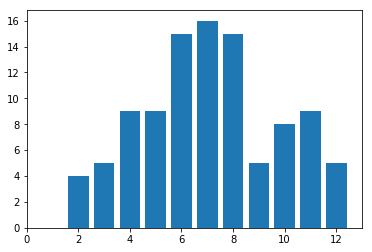

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

n= 100

dado1 = np.random.randint(1,7,n) 
dado2 = np.random.randint(1,7,n) 

suma = dado1 + dado2

histograma = [[i,0] for i in range(1,max(suma) +1)]

for j in range(len(histograma)):
    for i in range(len(suma)):
        if suma[i] == histograma[j][0]:
            histograma[j][1] = histograma[j][1] + 1

x = []
y = []
for i in range(len(histograma)):
    x.append(histograma[i][0])
    y.append(histograma[i][1])
    
plt.bar(x,y)
plt.show()


## Ejercicio 2:

Calcular con método Monte Carlo el area debajo de la semilongitud de onda de una onda sinusoidal. Usando los **métodos de la media muestral y exito/fracaso**.  

*Voy a trabajar en un rectangulo con base $\pi$ y altura $1$. Cuya area sería igual a $\pi$.*
*Pasos a seguir: *
*
1. En el rectangulo defino la función con la que voy a trabajar
2. Tiro pares de numeros aleatorios para definir puntos aleatorios dentro del rectangulo (x,y)
3. Si los puntos estan debajo de la curva que define la función (f(x)) los cuento
4. Tomo una cantidad (N) suficiente de puntos (x,y)< (x,f(x)) son utilizados para calcular el Area usando el concepto de sumas de Riemman*

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
from time import time

Tiempo de computo: 0.1056
Area obtenida: 1.9962 error 0.0038


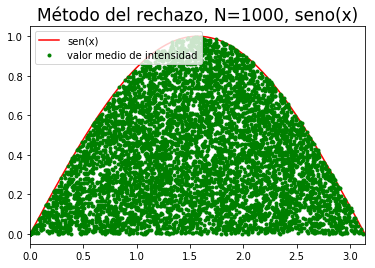

In [3]:
##METODO EXITO FRACASO
N = 10000
num = 0
g = np.zeros([N,2])

for w in range(N):
    x = np.pi*np.random.random_sample()
    y = np.random.random_sample()

    func_x = np.sin(x)
    
    if y<func_x:
        g[num,0] = x
        g[num,1] = y
        num = num + 1
        
#Calculo el area
A_calc = num/N *np.pi 

# se el area exacta es 2.
error = np.abs(2 - A_calc)

print ('Area obtenida:', round(A_calc,4), 'error', round(error, 4))

#creo el seno para graficarlo:
base = np.linspace(0,3.14,num=1000)
plt.plot(base, np.sin(base), '-', color='red', label='sen(x)')
plt.plot(g[:,0], g[:,1],'g.', label='Método exito/fracaso')

plt.xlim(xmin=0, xmax=3.1415)
plt.title('Método del rechazo, N=1000, seno(x)', fontsize=17)
plt.legend()
plt.show()

Tiempo de computo: 0.0897
Area obtenida: 2.002 error 0.002


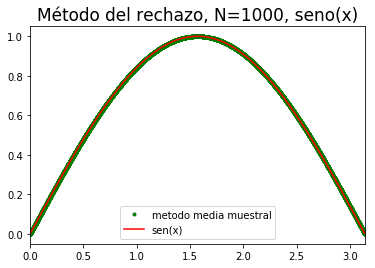

In [5]:
##METODO DE LA MEDIA MUESTRAL

N = 10000
suma = 0
num = 0

for w in range(N):
    x = np.pi*np.random.random_sample()
    funcion = np.sin(x)
    
    suma = suma + funcion
    
    g[num,0] = x
    g[num,1] = funcion
    
    num = num + 1
    
#Calculo el area
A_calc = suma /N *np.pi 

# se el area exacta es 2.
error = np.abs(2 - A_calc)

print ('Area obtenida:', round(A_calc,4), 'error', round(error, 4))

#creo el seno para graficarlo:
plt.plot(g[:,0], g[:,1],'g.', label='metodo media muestral')
base = np.linspace(0,3.14,num=1000)
plt.plot(base, np.sin(base), '-', color='red', label='sen(x)')

plt.xlim(xmin=0, xmax=3.1415)
plt.title('Método del rechazo, N=1000, seno(x)', fontsize=17)
plt.legend()
plt.show()

In [9]:
#Corroborar Método más eficiente, 

N = 10000
##METODO EXITO FRACASO
start = time()
num = 0

for w in range(N):
    
    x = np.pi*np.random.random_sample()
    y = np.random.random_sample()

    func_x = np.sin(x)
    
    if y<func_x:
        num = num + 1
        
#Calculo el area
A_calc = num/N *np.pi 

#tiempo que tarda
tiempo_extra = time() - start

print('exito fracaso:',round(tiempo_extra,5))
print('Area exito/fracaso:', round(A_calc,5))

##METODO MEDIA MUESTRAL

start = time()

suma = 0
num = 0

for w in range(N):
    x = np.pi*np.random.random_sample()
    funcion = np.sin(x)
    
    suma = suma + funcion
    
#Calculo el area
A_calc = suma /N *np.pi 

#tiempo que tarda
tiempo_extra = time() - start

print('Media muestral:',round(tiempo_extra,5))
print('Area media muestral:', round(A_calc,5))

exito fracaso: 0.09426
Area exito/fracaso: 2.02287
Media muestral: 0.05226
Area media muestral: 2.01342


## Ejercicio 3:
Calcular con método Monte Carlo el area debajo de la semilongitud de onda de una onda cosenoidal.

*Notar que el coseno entre xc[0, $\pi$] toma valores entre [-1,1] y el método del exito fracaso esta definido para: f(x)<0 así que no se lo puede utilizar, lo hago igual para que se vea el problema, cambio los límites de x-->[-1,1]

Area obtenida exito/frac: 1.5724 error 1.5724
Area obtenida media muest: 0.0109 error 0.0109


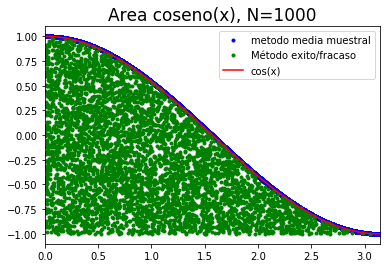

In [20]:
N = 10000 #pasos

##METODO EXITO FRACASO
num = 0
g1 = np.zeros([N,2])
a = 0

for w in range(N):
    x = np.pi*np.random.random_sample()
    y = 2 * np.random.random_sample() - 1 

    func_x = np.cos(x)
    
    if y<func_x:
        g1[num,0] = x
        g1[num,1] = y
        num = num + 1
        
        
#Calculo el area
A_calc1 = num/N *np.pi 

# se el area exacta es 0.
error1 = np.abs(A_calc1)


##METODO DE LA MEDIA MUESTRAL
suma = 0
num = 0
g2 = np.zeros([N,2])

for w in range(N):
    x = np.pi*np.random.random_sample()
    funcion = np.cos(x)
    
    suma = suma + funcion
    
    g2[num,0] = x
    g2[num,1] = funcion
    
    num = num + 1
    
#Calculo el area
A_calc2 = suma /N *np.pi 

# se el area exacta es 0.
error2 = np.abs(A_calc2)

print ('Area obtenida exito/frac:', round(A_calc1,4), 'error', round(error1, 4))
print ('Area obtenida media muest:', round(A_calc2,4), 'error', round(error2, 4))

#creo el seno para graficarlo:


#creo el seno para graficarlo:
plt.plot(g2[:,0], g2[:,1],'b.', label='metodo media muestral')
plt.plot(g1[:,0], g1[:,1],'g.', label='Método exito/fracaso')
base = np.linspace(0,3.14,num=1000)
plt.plot(base, np.cos(base), '-', color='red', label='cos(x)')

plt.xlim(xmin=0, xmax=3.1415)
plt.title('Area coseno(x), N=1000', fontsize=17)
plt.legend()
plt.show()

## Ejercicio 4:
Calcular con método Monte Carlo

**DUDA: ¿que hago con la parte imaginaria de la funcion?**

Area obtenida media muest: 6.8994


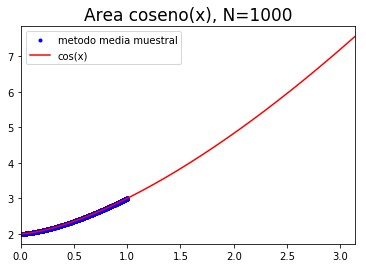

In [27]:
##METODO DE LA MEDIA MUESTRAL
N=10000
suma = 0
num = 0
g2 = np.zeros([N,2])

def funcion(w):
    f = 2 + w**(1.5)
    return f.real
    
for w in range(N):
    x = 2*np.random.random_sample()-1
    y = funcion(x) 
    
    suma = suma + y
    
    g2[num,0] = x
    g2[num,1] = y    
    num = num + 1
    
#Calculo el area
A_calc = suma /N *np.pi 

print ('Area obtenida media muest:', round(A_calc,4))

#creo el seno para graficarlo:


#creo el seno para graficarlo:
plt.plot(g2[:,0], g2[:,1],'b.', label='metodo media muestral')
base = np.linspace(0,3.14,num=1000)
plt.plot(base, funcion(base), '-', color='red', label='cos(x)')

plt.xlim(xmin=0, xmax=3.1415)
plt.title('Area coseno(x), N=1000', fontsize=17)
plt.legend()
plt.show()


## Ejercicio 5:

Determinar la eficiencia de cómputo y realizar un estudio de convergencia para calcular con el método Monte Carlo
PONER FUNCION
$$
Estimar la desviación estándar en función del número de muestreo.



## Ejercicio 6:

Modelar el esperimento de Buffon para estimar el valor de $\pi$, asignando valores que correspondan a los parámetros del problema.



## Ejercicio 7:

Realizar una simulación Monte Carlo simple para determinar la distancia total $D_T$ y distancia neta *D* (distancia al punto de partida) luego de 10, 100, 1000 y 10000 pasos de 1 unidad de una partícula moviéndose en un plano.



## Ejercicio 8:

Repetir el ejercicio del item anterior para una partícula moviéndose en 3 dimensiones.



## Ejercicio 9:

Realizar una simulación Monte Carlo del transporte de partículas en 2D que sólo pueden interactuar de dos modos: absorción o scattering caracterizados por secciones eficaces $\sigma_A$ y $\sigma_S$ , respectivamente. En particular, se tiene que la distribución angular de $\sigma_S$ es isotrópica e independiente de la energía, mientras que $\sigma_A = C/E$ , donde *C* es una constante que satisface la normalización. El problema consiste en calcular la transmisividad de una muestra de espesor *L* por parte de una haz puntual de partículas de energía inicial $E_0$. Fijar valores de absorción (completo depósito local de la energía residual), de modo tal que no se extienda demasiado el tiempo de simulación.